In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import gc
import psutil
import os

%matplotlib inline
print(os.listdir("../inputs"))

def show_ram_usage():
    py = psutil.Process(os.getpid())
    print('RAM usage: {} GB'.format(py.memory_info()[0]/2. ** 30))
show_ram_usage()

['test.csv', 'train.csv', 'potential_energy.csv', 'magnetic_shielding_tensors.csv', 'scalar_coupling_contributions.csv', 'sample_submission.csv', 'mulliken_charges.csv', 'structures.csv', 'dipole_moments.csv', 'structures']
RAM usage: 0.11571884155273438 GB


In [2]:
%%time
train_dtypes = {
    'molecule_name': 'category',
    'atom_index_0': 'int8',
    'atom_index_1': 'int8',
    'type': 'category',
    'scalar_coupling_constant': 'float32'
}
# Load the data
train = pd.read_csv('../inputs/train.csv', index_col='id', dtype=train_dtypes)
#test = pd.read_csv('../inputs/test.csv', index_col='id')
G1_train = np.float32(np.load('G1_array_train.npy'))
rb_train = np.float32(np.load('rb_train.npy'))
print('After data loadin RAM Usage:')
show_ram_usage()
# Now we add to the train file
train['rb'] = rb_train
for i in range(80):
    train[f'g1_{i}'] = G1_train[:, i]
print(display(train.head()))
# ---------------------------------------------------------------
show_ram_usage()
del rb_train, G1_train
gc.collect()
#-----------------------------------------------------------------
print('After deleting:')
# ---------------------------------------------------------------
show_ram_usage()

/home/sher/anaconda2/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


After data loadin RAM Usage:
RAM usage: 1.6760139465332031 GB


,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,rb,g1_0,g1_1,g1_2,g1_3,...,g1_70,g1_71,g1_72,g1_73,g1_74,g1_75,g1_76,g1_77,g1_78,g1_79
id,,,,,,,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.807602,1.091953,0.012507,0.000000,0.0,0.0,...,2.005144,0.000000,0.0,0.0,0.0,1.796993,0.000000,0.0,0.0,0.0
1,dsgdb9nsd_000001,1,2,2JHH,-11.257000,1.783120,0.066349,0.279369,0.0,0.0,...,1.518414,0.845837,0.0,0.0,0.0,1.335081,0.723431,0.0,0.0,0.0
2,dsgdb9nsd_000001,1,3,2JHH,-11.254800,1.783147,0.066351,0.279371,0.0,0.0,...,1.518416,0.845837,0.0,0.0,0.0,1.335083,0.723431,0.0,0.0,0.0
3,dsgdb9nsd_000001,1,4,2JHH,-11.254300,1.783157,0.066352,0.279371,0.0,0.0,...,1.518418,0.845837,0.0,0.0,0.0,1.335084,0.723431,0.0,0.0,0.0
4,dsgdb9nsd_000001,2,0,1JHC,84.807404,1.091952,0.012507,0.000000,0.0,0.0,...,2.005140,0.000000,0.0,0.0,0.0,1.796990,0.000000,0.0,0.0,0.0


None
RAM usage: 3.0817489624023438 GB
After deleting:
RAM usage: 1.6935653686523438 GB
CPU times: user 7.62 s, sys: 2.67 s, total: 10.3 s
Wall time: 13.4 s


*** Training Model for 1JHN ***
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.736442	valid_1's l1: 0.946088
[200]	training's l1: 0.627824	valid_1's l1: 0.890957
[300]	training's l1: 0.554505	valid_1's l1: 0.864955
[400]	training's l1: 0.495769	valid_1's l1: 0.846044
[500]	training's l1: 0.44429	valid_1's l1: 0.829996
[600]	training's l1: 0.400336	valid_1's l1: 0.81718
[700]	training's l1: 0.362681	valid_1's l1: 0.807532
[800]	training's l1: 0.331237	valid_1's l1: 0.801528
[900]	training's l1: 0.303795	valid_1's l1: 0.795801
[1000]	training's l1: 0.279986	valid_1's l1: 0.791115
[1100]	training's l1: 0.258887	valid_1's l1: 0.786953
[1200]	training's l1: 0.24156	valid_1's l1: 0.783686
[1300]	training's l1: 0.22564	valid_1's l1: 0.780579
[1400]	training's l1: 0.210661	valid_1's l1: 0.778266
[1500]	training's l1: 0.198023	valid_1's l1: 0.775594
Did not meet early stopping. Best iteration is:
[1500]	training's l1: 0.198023	valid_1's l1: 0.775594
1JHN, 

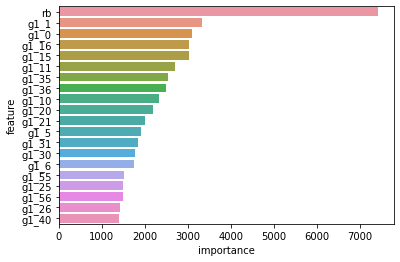

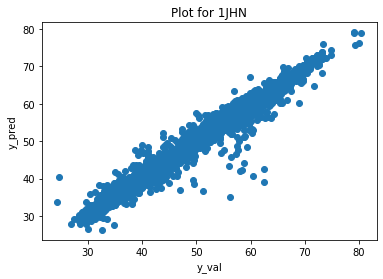

RAM usage: 1.8132743835449219 GB
*** Training Model for 1JHC ***
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 2.0796	valid_1's l1: 2.18019
[200]	training's l1: 1.86174	valid_1's l1: 2.01834
[300]	training's l1: 1.71966	valid_1's l1: 1.92657
[400]	training's l1: 1.61275	valid_1's l1: 1.86176
[500]	training's l1: 1.52145	valid_1's l1: 1.81208
[600]	training's l1: 1.45032	valid_1's l1: 1.77619
[700]	training's l1: 1.38829	valid_1's l1: 1.74877
[800]	training's l1: 1.33236	valid_1's l1: 1.72367
[900]	training's l1: 1.28257	valid_1's l1: 1.70294
[1000]	training's l1: 1.23822	valid_1's l1: 1.68635
[1100]	training's l1: 1.19692	valid_1's l1: 1.67149
[1200]	training's l1: 1.15892	valid_1's l1: 1.65638
[1300]	training's l1: 1.12298	valid_1's l1: 1.64384
[1400]	training's l1: 1.09025	valid_1's l1: 1.63233
[1500]	training's l1: 1.05908	valid_1's l1: 1.62301
Did not meet early stopping. Best iteration is:
[1500]	training's l1: 1.05908	valid_1's l1: 1.62301
1J

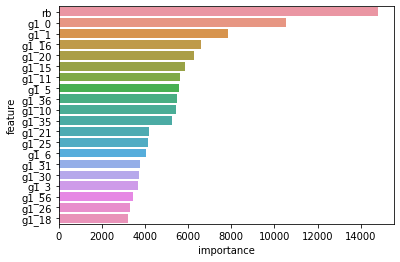

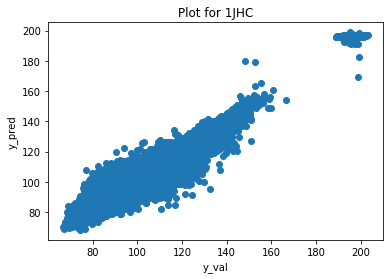

RAM usage: 1.8141212463378906 GB
*** Training Model for 2JHH ***
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.279587	valid_1's l1: 0.306722
[200]	training's l1: 0.23822	valid_1's l1: 0.277886
[300]	training's l1: 0.214182	valid_1's l1: 0.263092
[400]	training's l1: 0.197183	valid_1's l1: 0.253922
[500]	training's l1: 0.18491	valid_1's l1: 0.248004
[600]	training's l1: 0.174912	valid_1's l1: 0.243421
[700]	training's l1: 0.165971	valid_1's l1: 0.239752
[800]	training's l1: 0.157845	valid_1's l1: 0.236524
[900]	training's l1: 0.150326	valid_1's l1: 0.233419
[1000]	training's l1: 0.14398	valid_1's l1: 0.231169
[1100]	training's l1: 0.137996	valid_1's l1: 0.228994
[1200]	training's l1: 0.132423	valid_1's l1: 0.227229
[1300]	training's l1: 0.127469	valid_1's l1: 0.225679
[1400]	training's l1: 0.122511	valid_1's l1: 0.224187
[1500]	training's l1: 0.117914	valid_1's l1: 0.222852
Did not meet early stopping. Best iteration is:
[1500]	training's l1: 0.11

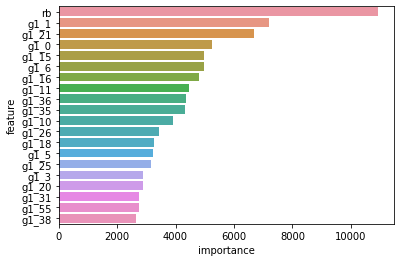

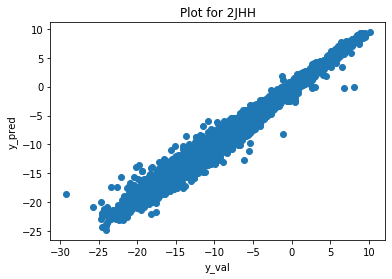

RAM usage: 1.81549072265625 GB
*** Training Model for 2JHN ***
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.345364	valid_1's l1: 0.404149
[200]	training's l1: 0.292713	valid_1's l1: 0.373796
[300]	training's l1: 0.25417	valid_1's l1: 0.354881
[400]	training's l1: 0.226738	valid_1's l1: 0.343453
[500]	training's l1: 0.207313	valid_1's l1: 0.336854
[600]	training's l1: 0.190283	valid_1's l1: 0.331507
[700]	training's l1: 0.175605	valid_1's l1: 0.327446
[800]	training's l1: 0.16204	valid_1's l1: 0.323829
[900]	training's l1: 0.150137	valid_1's l1: 0.320314
[1000]	training's l1: 0.139855	valid_1's l1: 0.31773
[1100]	training's l1: 0.130931	valid_1's l1: 0.315509
[1200]	training's l1: 0.122761	valid_1's l1: 0.313317
[1300]	training's l1: 0.115799	valid_1's l1: 0.3117
[1400]	training's l1: 0.109849	valid_1's l1: 0.310408
[1500]	training's l1: 0.103308	valid_1's l1: 0.309118
Did not meet early stopping. Best iteration is:
[1500]	training's l1: 0.103308

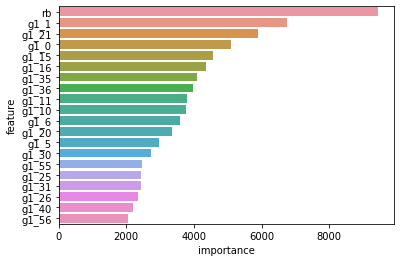

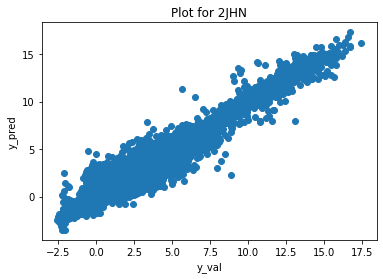

RAM usage: 1.8274307250976562 GB
*** Training Model for 2JHC ***
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.876678	valid_1's l1: 0.90138
[200]	training's l1: 0.7922	valid_1's l1: 0.833266
[300]	training's l1: 0.743273	valid_1's l1: 0.798448
[400]	training's l1: 0.704131	valid_1's l1: 0.771752
[500]	training's l1: 0.673549	valid_1's l1: 0.752314
[600]	training's l1: 0.649003	valid_1's l1: 0.738095
[700]	training's l1: 0.627372	valid_1's l1: 0.726237
[800]	training's l1: 0.608349	valid_1's l1: 0.716533
[900]	training's l1: 0.590523	valid_1's l1: 0.707677
[1000]	training's l1: 0.574405	valid_1's l1: 0.700518
[1100]	training's l1: 0.559917	valid_1's l1: 0.694464
[1200]	training's l1: 0.546112	valid_1's l1: 0.688897
[1300]	training's l1: 0.532964	valid_1's l1: 0.684075
[1400]	training's l1: 0.520887	valid_1's l1: 0.679312
[1500]	training's l1: 0.508713	valid_1's l1: 0.674531
Did not meet early stopping. Best iteration is:
[1500]	training's l1: 0.50

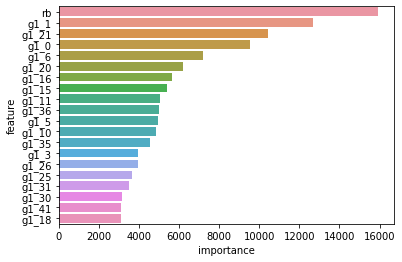

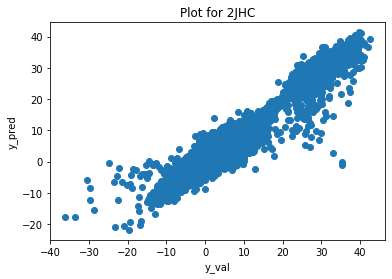

RAM usage: 1.8181190490722656 GB
*** Training Model for 3JHH ***
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.334142	valid_1's l1: 0.347388
[200]	training's l1: 0.285303	valid_1's l1: 0.3091
[300]	training's l1: 0.259083	valid_1's l1: 0.291821
[400]	training's l1: 0.239293	valid_1's l1: 0.279719
[500]	training's l1: 0.224398	valid_1's l1: 0.271953
[600]	training's l1: 0.212226	valid_1's l1: 0.265558
[700]	training's l1: 0.201599	valid_1's l1: 0.260574
[800]	training's l1: 0.191975	valid_1's l1: 0.256342
[900]	training's l1: 0.183877	valid_1's l1: 0.253188
[1000]	training's l1: 0.176638	valid_1's l1: 0.250458
[1100]	training's l1: 0.169601	valid_1's l1: 0.24783
[1200]	training's l1: 0.163094	valid_1's l1: 0.245497
[1300]	training's l1: 0.157091	valid_1's l1: 0.24344
[1400]	training's l1: 0.151667	valid_1's l1: 0.241618
[1500]	training's l1: 0.146397	valid_1's l1: 0.239974
Did not meet early stopping. Best iteration is:
[1500]	training's l1: 0.146

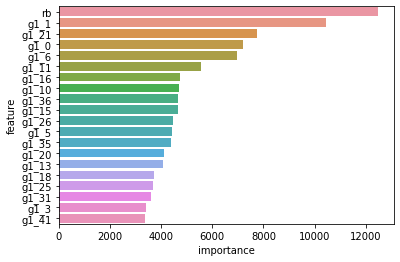

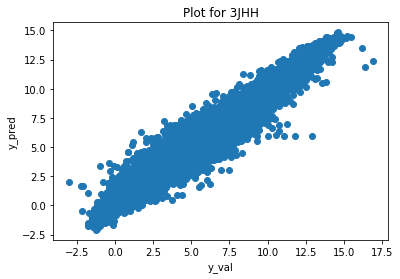

RAM usage: 1.8182449340820312 GB
*** Training Model for 3JHN ***
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.242527	valid_1's l1: 0.27465
[200]	training's l1: 0.204952	valid_1's l1: 0.250741
[300]	training's l1: 0.179863	valid_1's l1: 0.238391
[400]	training's l1: 0.163283	valid_1's l1: 0.231699
[500]	training's l1: 0.14995	valid_1's l1: 0.226785
[600]	training's l1: 0.13712	valid_1's l1: 0.222228
[700]	training's l1: 0.128265	valid_1's l1: 0.219493
[800]	training's l1: 0.118969	valid_1's l1: 0.216896
[900]	training's l1: 0.111042	valid_1's l1: 0.214988
[1000]	training's l1: 0.104551	valid_1's l1: 0.213451
[1100]	training's l1: 0.0983669	valid_1's l1: 0.212019
[1200]	training's l1: 0.0925455	valid_1's l1: 0.210613
[1300]	training's l1: 0.0873644	valid_1's l1: 0.209522
[1400]	training's l1: 0.0824035	valid_1's l1: 0.208299
[1500]	training's l1: 0.0777826	valid_1's l1: 0.207321
Did not meet early stopping. Best iteration is:
[1500]	training's l1:

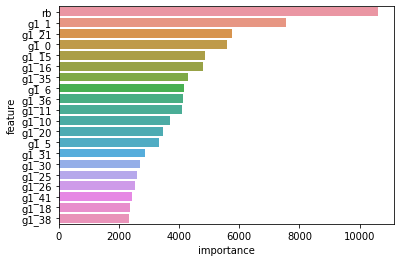

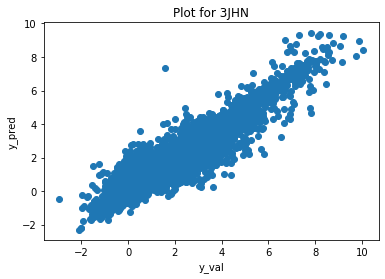

RAM usage: 1.85491943359375 GB
*** Training Model for 3JHC ***
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.757741	valid_1's l1: 0.772407
[200]	training's l1: 0.679437	valid_1's l1: 0.704755
[300]	training's l1: 0.637394	valid_1's l1: 0.671836
[400]	training's l1: 0.605249	valid_1's l1: 0.647586
[500]	training's l1: 0.57995	valid_1's l1: 0.629631
[600]	training's l1: 0.558434	valid_1's l1: 0.615488
[700]	training's l1: 0.540376	valid_1's l1: 0.60459
[800]	training's l1: 0.524336	valid_1's l1: 0.5947
[900]	training's l1: 0.510444	valid_1's l1: 0.587003
[1000]	training's l1: 0.497087	valid_1's l1: 0.579371
[1100]	training's l1: 0.485457	valid_1's l1: 0.573404
[1200]	training's l1: 0.475068	valid_1's l1: 0.568257
[1300]	training's l1: 0.465052	valid_1's l1: 0.563638
[1400]	training's l1: 0.455858	valid_1's l1: 0.559409
[1500]	training's l1: 0.447169	valid_1's l1: 0.555595
Did not meet early stopping. Best iteration is:
[1500]	training's l1: 0.44716

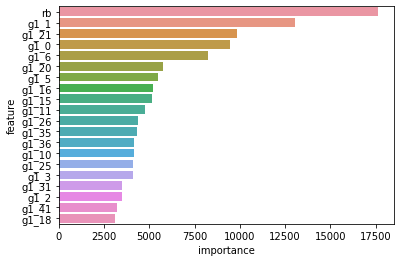

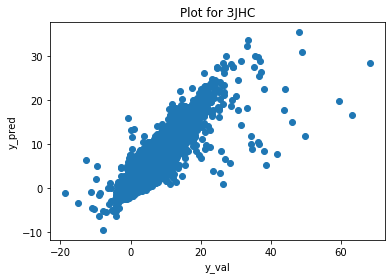

RAM usage: 1.8302078247070312 GB


,type,cv_score
0,1JHN,-0.254126
1,1JHC,0.484285
2,2JHH,-1.501245
3,2JHN,-1.174032
4,2JHC,-0.393737
5,3JHH,-1.427226
6,3JHN,-1.573486
7,3JHC,-0.587716


None
mean CV score :  -0.8034105354043586
RAM usage: 1.8302078247070312 GB
CPU times: user 2h 4min 38s, sys: 1min 57s, total: 2h 6min 36s
Wall time: 16min 37s


In [3]:
%%time
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
import seaborn as sns
# We will build a simple model no folds or splits

model_params = ['1JHN', '1JHC', '2JHH', '2JHN', '2JHC', '3JHH', '3JHN', '3JHC']

LGB_PARAMS = {
    'objective': 'regression',
    'metric': 'mae',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'learning_rate': 0.2,
    'num_leaves': 128,
    'min_child_samples': 79,
    'max_depth': 9,
    'subsample_freq': 1,
    'subsample': 0.9,
    'bagging_seed': 11,
    'reg_alpha': 0.1,
    'reg_lambda': 0.3,
    'colsample_bytree': 1.0
}

def build_type_dataframe(base, coupling_type):
    base = base[base['type'] == coupling_type].drop('type', axis=1).copy()
    base = base.drop(['atom_index_0', 'atom_index_1', 'molecule_name'], axis=1)
    return base

def train_and_predict_coupling_type(train, coupling_type):
    print(f'*** Training Model for {coupling_type} ***')
    cv_score = 0
    df= build_type_dataframe(train, coupling_type)
    X_data = df.drop(['scalar_coupling_constant'], axis=1).values.astype('float32')
    y_data = df['scalar_coupling_constant'].values.astype('float32')
    
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=128)

    model = LGBMRegressor(**LGB_PARAMS, n_estimators=1500, n_jobs = -1)
    model.fit(X_train, y_train, 
    eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric='mae',
            verbose=100, early_stopping_rounds=200)

    y_val_pred = model.predict(X_val)
    val_score = np.log(mean_absolute_error(y_val, y_val_pred))
    print(f'{coupling_type}, logMAE: {val_score}')
        
    cv_score += val_score 
    
    # Plot Feature Importance
    cols = list(df.columns)
    cols.remove('scalar_coupling_constant')
    cols
    feat_imp = model.feature_importances_
    df_importance = pd.DataFrame({'feature': cols, 'importance': feat_imp})
    df_importance = df_importance.sort_values('importance', ascending=False)[:20]
    sns.barplot(x="importance", y="feature", data=df_importance)
    
    
    # Plot with matplotlib
    x, y = y_val, y_val_pred
    plt.figure()
    plt.scatter(x, y)
    plt.title(f'Plot for {coupling_type}')
    plt.xlabel('y_val')
    plt.ylabel('y_pred')
    plt.show()
    return cv_score


cv_scores = {}
for coupling_type in model_params:
    cv_score = train_and_predict_coupling_type(train, coupling_type)
    cv_scores[coupling_type] = cv_score
    # ---------------------------------------------------------------
    show_ram_usage()


cv_df = pd.DataFrame({'type': list(cv_scores.keys()), 'cv_score': list(cv_scores.values())})
cv_mean = np.mean(list(cv_scores.values()))

print(display(cv_df.head(8)))
print('mean CV score : ', cv_mean)

# ---------------------------------------------------------------
show_ram_usage()